# Cuál es la arquitectura de los transformers

## importante: https://jalammar.github.io/illustrated-transformer/

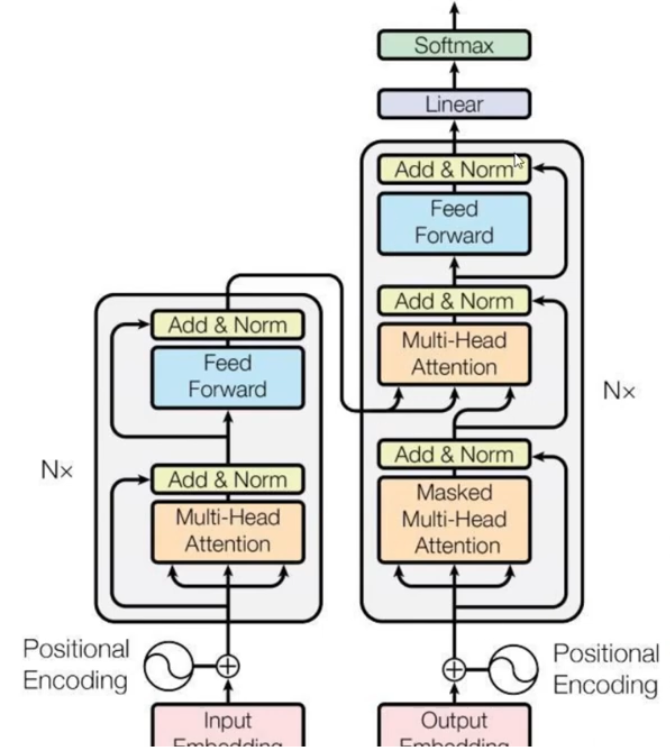

Tienen una arquitextura encoder-decoder<br>
encoder: transforma los datos de entrada en una representación comprimida, captura las características más importantes<br>
decoder: Reconstruye los datos de entrada lo más fielmente posible a partir de la representación codificada generada por encoder<br>
<br>
El bloque de la izquierda es el encoder y el de la derecha es el decoder<br>
como input entra la frase completa

### Forma old-school de hacer transformers:
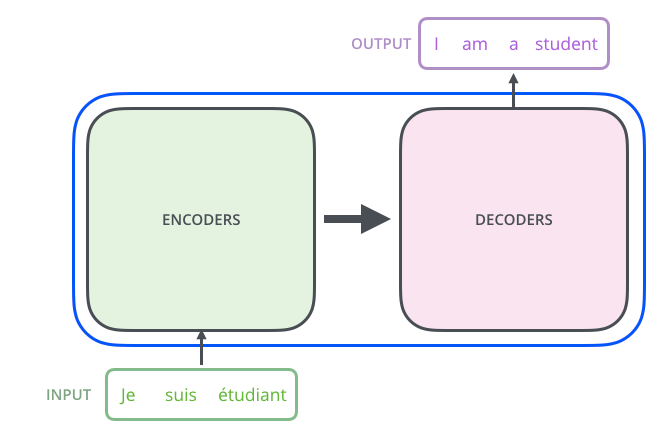

entra la frase al encoder, la convierte, esa nueva representación se pasa al decoder y el decoder genera la salida

#### Otra forma de representar los transfomers

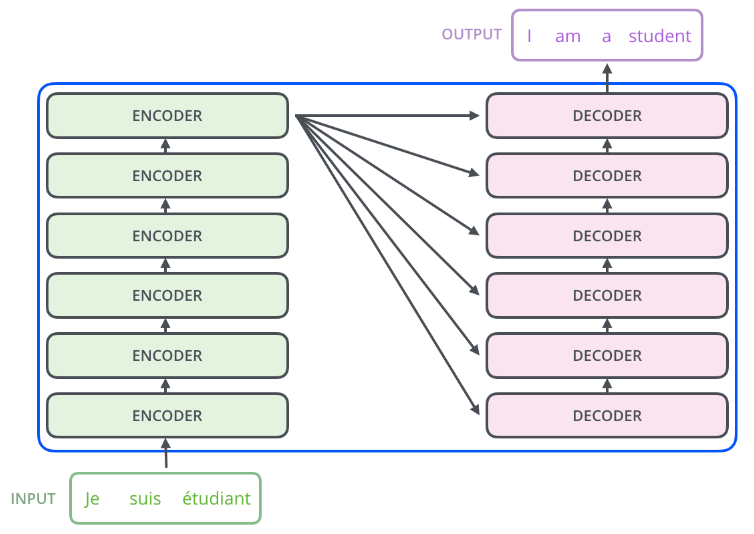

Qué hay dentro de cada encoder y decoder?

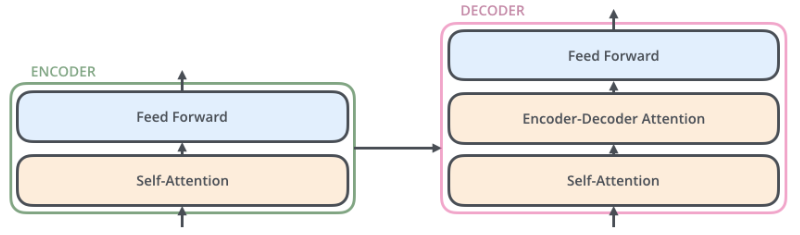

La capa de Encoder-Decoder Attention es también llamada una cros attention layer

Al igual que los humanos, primero debe recibir toda la información, por ejemplo toda la frase a traducir para luego sí realizar la traducción , no puede ir traduciendo parte por parte

Para menejar texto debo convertirlo a una representación numérica, ese sería el embeding

Por ejemplo, estos serían los embedings para cada una de estas palabras:

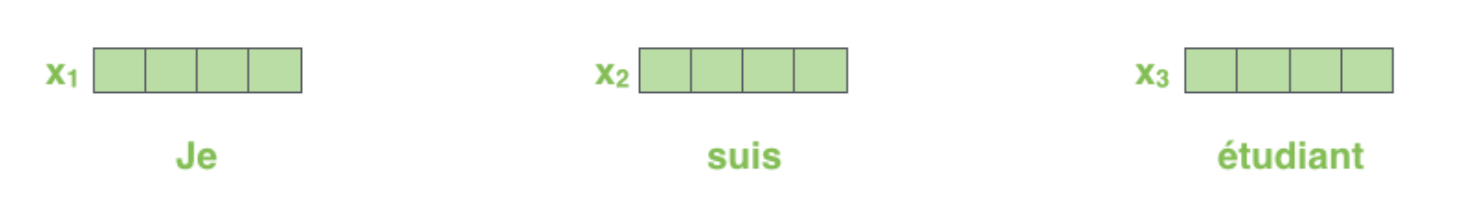

Entonces, las 3 palabras entran al encoder, más específicamente a la capa de self-attention, y esta capa genera, los attention scores de cada palabra, que sería z1, z2, z3 y el resulado luego de la capa de feed-forward es pasar esos resultados al siguiente encoder

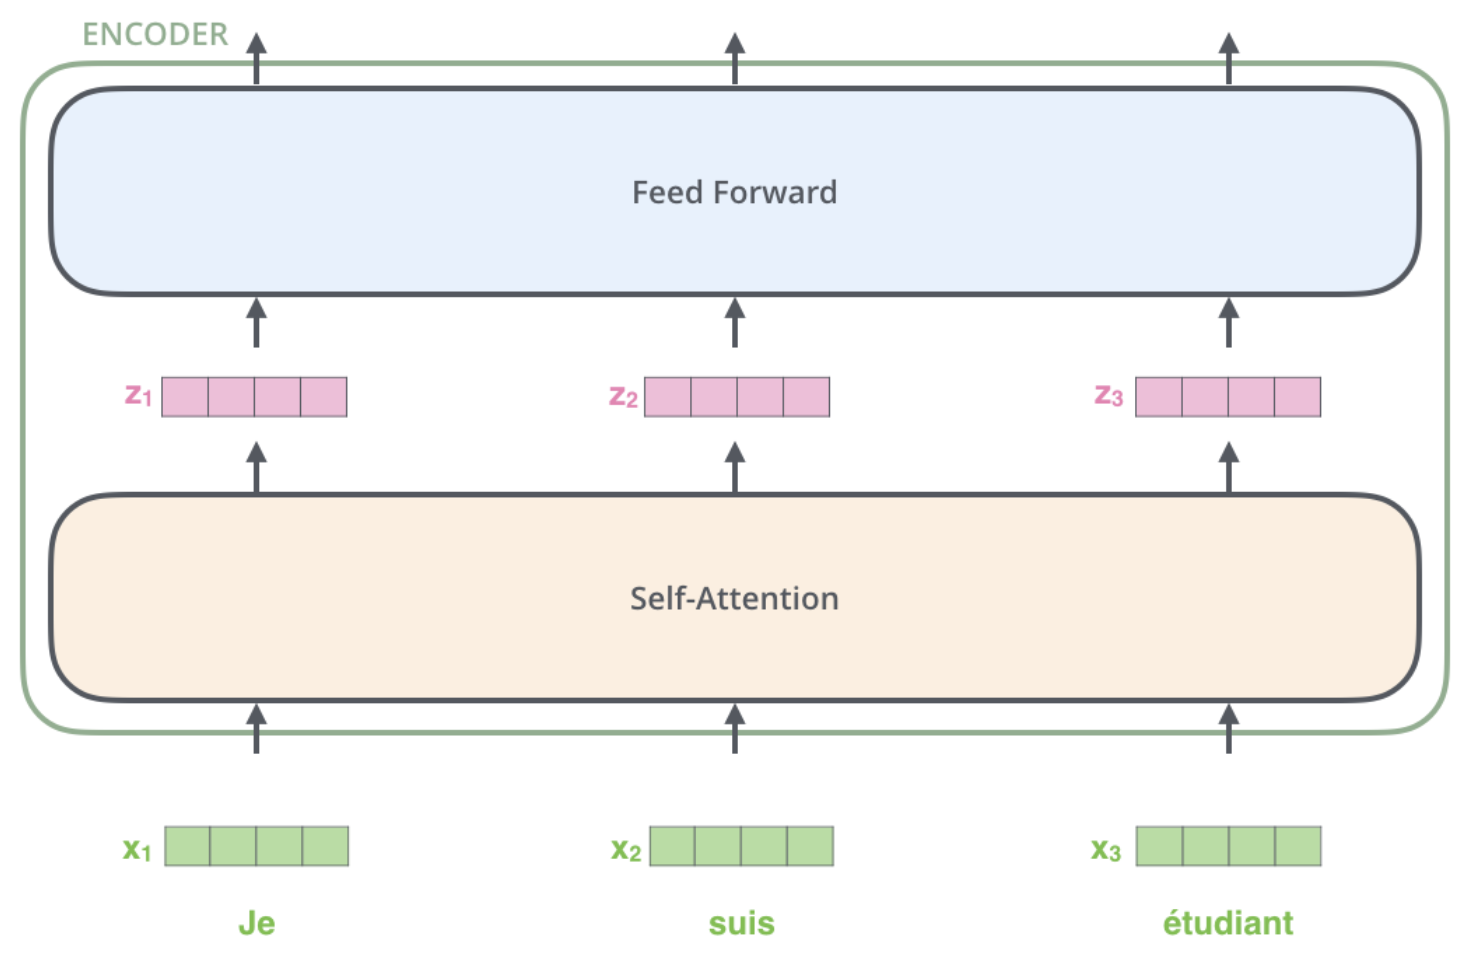

A qué se refiere con eso de "attention"?
Por ejemplo, si yo tengo una oración que dice: Pedro no cruzó la callé porque él estaba muy cansado.
Para que se entiendo que cuando se escribe "él", se refiere a Pedro, es necesario asignar el ättetntion", el cuál es un número de 0 a 1, la cuál relaciona cada palabra con otra, por ejemplo el attention entre "él" y "Pedro" es mayor al de "él" y "cruzó"

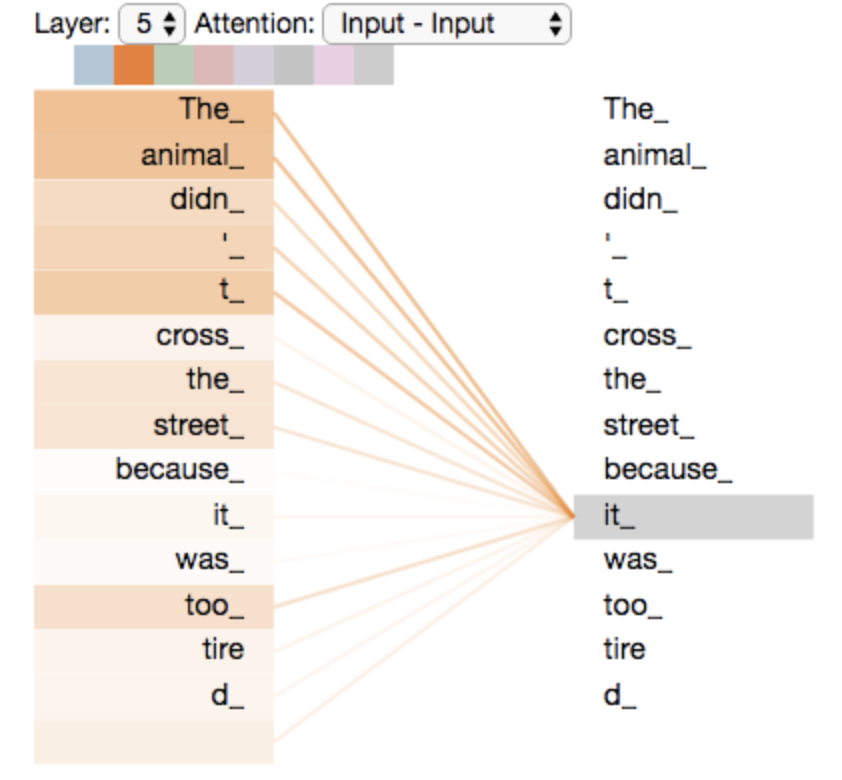

Cómo se computa el self-attention:

El embedding de cada palabra no es suficiente para calcular el self-attention, así que se generam los quieries, keys y values. estos se generan multiplicando como embedding por la matriz de pesos de la derecha de cada arreglo nuevo que necesito.

**Queries:** La palabra a la que le estoy buscando correspondencia, en nuestro ejemplo sería "él".
**Keys:** Todas aquellas palabras que no sean la query.
**Value:** Un valor asociado a cada palabra.

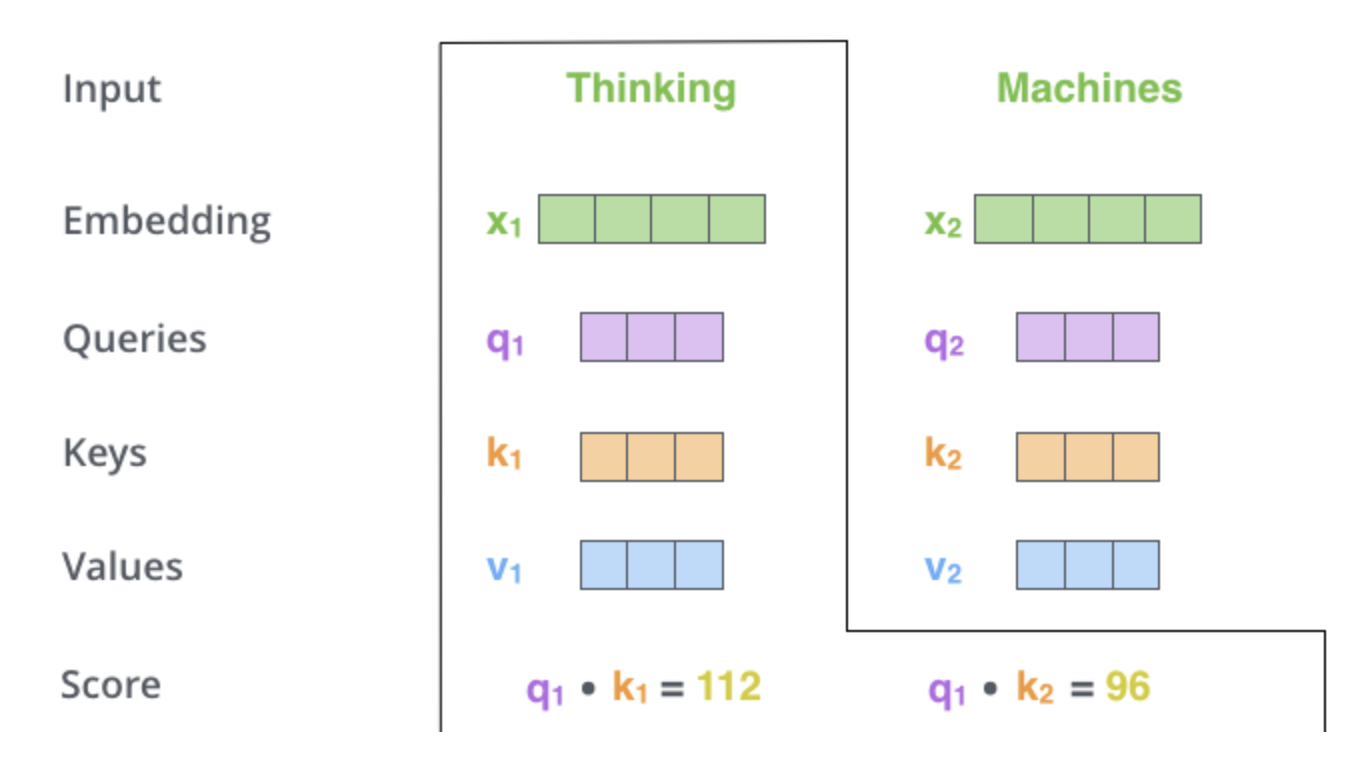

Luego de eso hago un producto punto entre la query con las llaves de todas las palabras, obviamente el producto punto entte la query y su llave va a ser el mayor número, y luego voy a buscar cuál tiene el siguiente núemro mayor (es decir, mayor correlación) y luego realizó normalización dividiendo por 8 y aplicando una softmax y ese sería el attention score

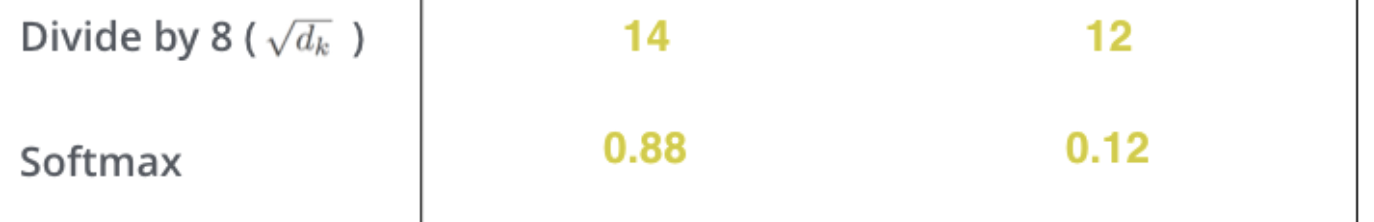

Luego multiplico el attention score de 1 con el value de cada palabra y sumo esas multiplicaciones, luego hago lo mismo con el 2

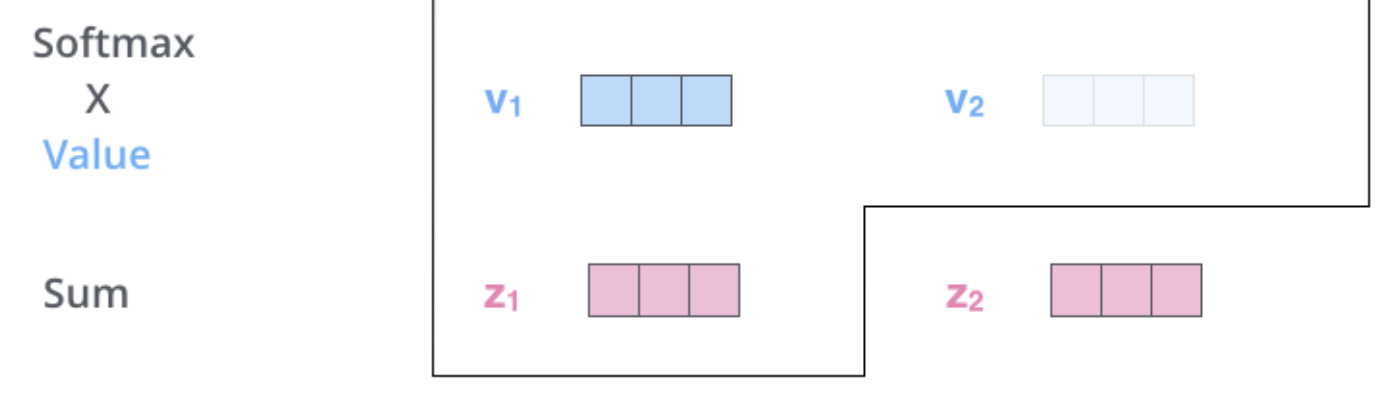

## Multi-headed

Es cuando se tiene más de un query

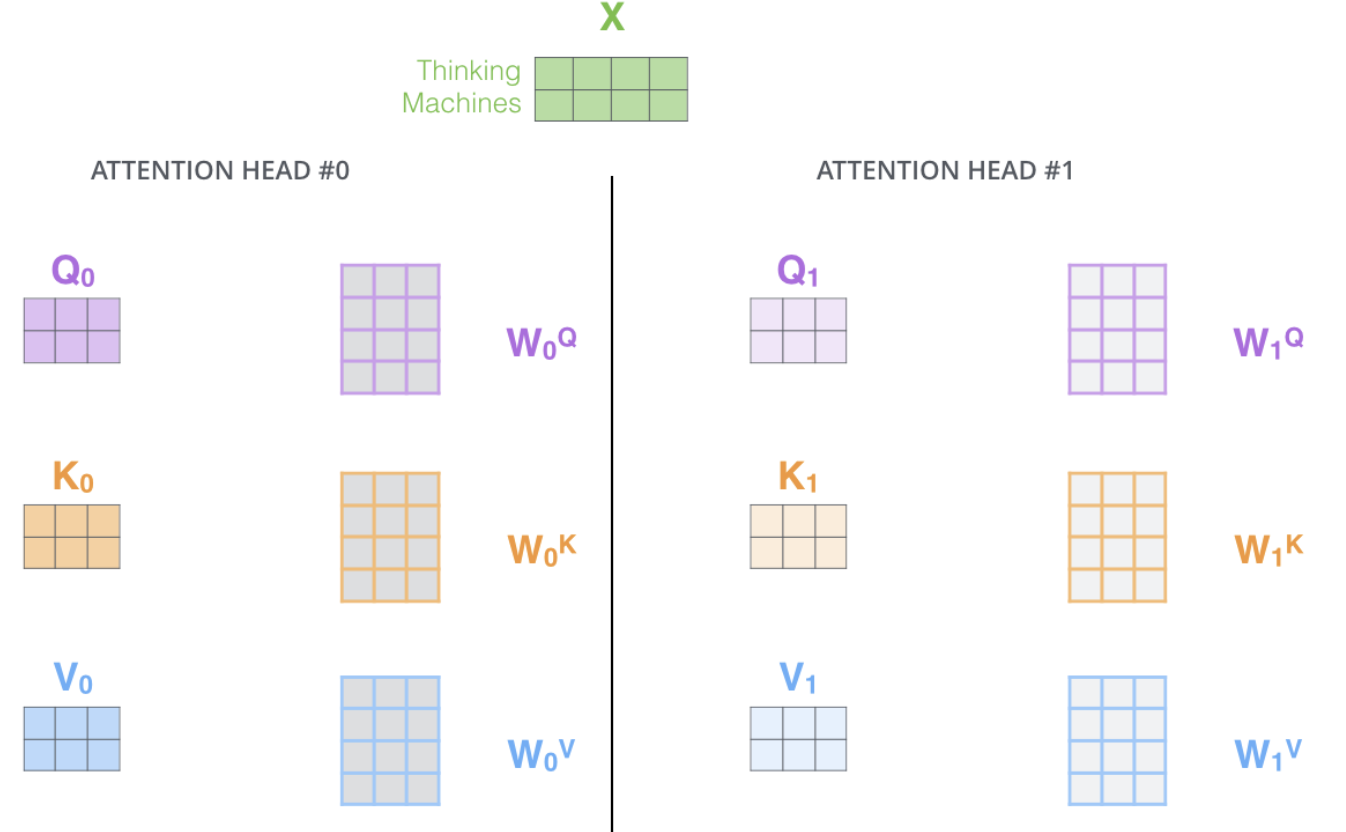

Luego de tener todas las Z, o sea todos los resultados de las attention-head, se concatenan y se multiplica por una matriz de pesos W0 y así obtengo una sola Z como resultado

#### En resumen:

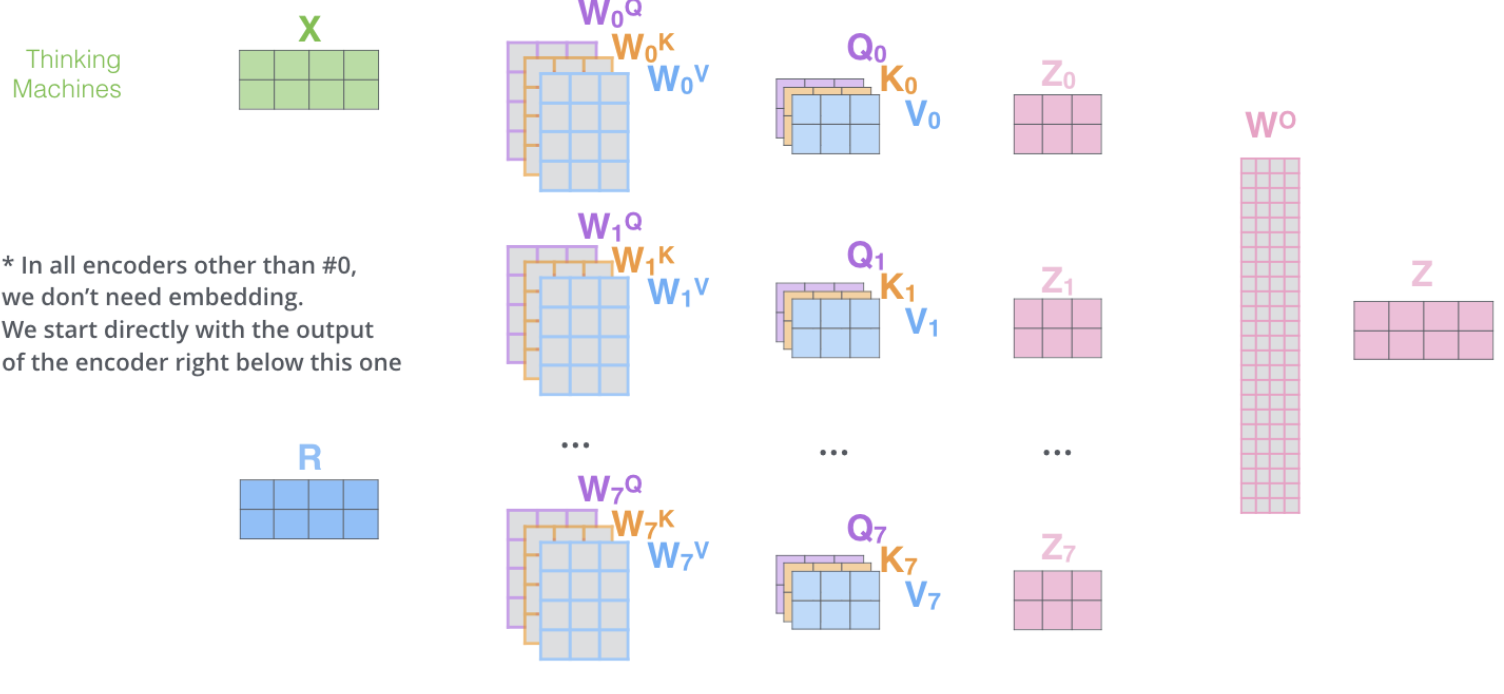